In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, r2_score,roc_auc_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import CatBoostClassifier, Pool, CatBoostRegressor
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

In [50]:
filepath = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/properties_data_cleaned_05_12_14H30.csv"
income_data = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/INCOME DATA 2022.csv"
poverty_data = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/POVERTY RISK DATA.csv"
zipcode = "/Users/irisvirus/Desktop/Becode/Python/Projects/Regression/regression/BELGIUM/zipcodes_num_nl_new_Tumi.xls"
id = pd.read_csv(income_data)
povd = pd.read_csv(poverty_data)
df = pd.read_csv(filepath)
zcode = pd.read_excel(zipcode)


In [51]:
df

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,buildingStateLabel
0,1.0,APARTMENT,ANTWERPEN,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,TO_RENOVATE,0.0,0.0,70.0,NaN,D,Antwerp,NaN
1,2.0,APARTMENT,Ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,GOOD,0.0,0.0,81.0,NaN,F,Brussels,NaN
2,1.0,APARTMENT,DEURNE,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,GOOD,45.0,0.0,88.0,NaN,D,Antwerp,NaN
3,2.0,APARTMENT,Uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,TO_BE_DONE_UP,0.0,0.0,76.0,NaN,D,Brussels,NaN
4,4.0,HOUSE,Kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,GOOD,0.0,0.0,172.0,510.0,C,East Flanders,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,3.0,APARTMENT,Knokke-Heist,8300.0,0.0,NaN,1351500.0,0.0,32.0,0.0,AS_NEW,97.0,0.0,129.0,NaN,NaN,West Flanders,NaN
15347,1.0,HOUSE,Mariembourg,5660.0,1.0,4.0,125000.0,0.0,30.0,0.0,NaN,0.0,0.0,64.0,653.0,D,Namur,NaN
15348,4.0,HOUSE,Denderleeuw,9470.0,0.0,3.0,255000.0,0.0,0.0,0.0,NaN,90.0,0.0,174.0,200.0,NaN,East Flanders,NaN
15349,3.0,HOUSE,Knesselare,9910.0,0.0,4.0,429544.0,0.0,0.0,0.0,GOOD,0.0,0.0,190.0,320.0,NaN,East Flanders,NaN


In [52]:
#Clean Income Data
id_new_header = ["Locality", "min_median_income", "unnamed", "max_median_income", "locality"]
id.columns = id_new_header
id = id.drop(columns=["Locality", "unnamed"])

In [53]:
id.head()

,min_median_income,max_median_income,locality
0,23.986,51.2609 4.3695,Antwerp
1,30.579,51.1605 4.5105,Boechout
2,25.936,51.0937 4.3731,Boom
3,26.591,51.1915 4.488,Borsbeek
4,29.869,51.31 4.4995,Brasschaat


In [54]:
id.shape

(579, 3)

In [55]:
#rename columns from bpPost
zcode = zcode.rename(columns={'Localité': 'locality'})

In [56]:
zcode.head()

,Postcode,NAME,SUBMUNICIPALITY,MAIN MUNICIPALITY,Provincie
0,2040,Berendrecht,Ja,ANTWERPEN,ANTWERPEN
1,2040,Lillo,Ja,ANTWERPEN,ANTWERPEN
2,2040,Zandvliet,Ja,ANTWERPEN,ANTWERPEN
3,2070,Burcht,Ja,ZWIJNDRECHT,ANTWERPEN
4,2100,Deurne,Ja,ANTWERPEN,ANTWERPEN


In [57]:
zcode.rename(columns={'Postcode': 'postal_code', 'Provincie': 'province','NAME':'locality','MAIN MUNICIPALITY':"municipality"}, inplace=True)


In [58]:
zcode.head()

,postal_code,locality,SUBMUNICIPALITY,municipality,province
0,2040,Berendrecht,Ja,ANTWERPEN,ANTWERPEN
1,2040,Lillo,Ja,ANTWERPEN,ANTWERPEN
2,2040,Zandvliet,Ja,ANTWERPEN,ANTWERPEN
3,2070,Burcht,Ja,ZWIJNDRECHT,ANTWERPEN
4,2100,Deurne,Ja,ANTWERPEN,ANTWERPEN


In [59]:
zcode

,postal_code,locality,SUBMUNICIPALITY,municipality,province
0,2040,Berendrecht,Ja,ANTWERPEN,ANTWERPEN
1,2040,Lillo,Ja,ANTWERPEN,ANTWERPEN
2,2040,Zandvliet,Ja,ANTWERPEN,ANTWERPEN
3,2070,Burcht,Ja,ZWIJNDRECHT,ANTWERPEN
4,2100,Deurne,Ja,ANTWERPEN,ANTWERPEN
...,...,...,...,...,...
2716,8930,Menen,Neen,MENEN,WEST-VLAANDEREN
2717,8940,Wervik,Neen,WERVIK,WEST-VLAANDEREN
2718,8957,Mesen,Neen,MESEN,WEST-VLAANDEREN
2719,8970,Poperinge,Neen,POPERINGE,WEST-VLAANDEREN


In [60]:
id["postal_code"] = None
id["province"] = None

In [61]:
zcode.province = zcode["province"].astype(str)
zcode.locality = zcode["locality"].astype(str)
zcode.municipality = zcode["municipality"].astype(str)
zcode.province = zcode.province.apply(lambda x: x.strip().lower())
zcode.locality = zcode.locality.apply(lambda x: x.strip().lower())
zcode.municipality = zcode.municipality.apply(lambda x: x.strip().lower())
id.locality = id.locality.apply(lambda x: x.strip().lower())
id.locality = id["locality"].astype(str)

In [62]:
zcode.head()

,postal_code,locality,SUBMUNICIPALITY,municipality,province
0,2040,berendrecht,Ja,antwerpen,antwerpen
1,2040,lillo,Ja,antwerpen,antwerpen
2,2040,zandvliet,Ja,antwerpen,antwerpen
3,2070,burcht,Ja,zwijndrecht,antwerpen
4,2100,deurne,Ja,antwerpen,antwerpen


In [63]:
id.columns

Index(['min_median_income', 'max_median_income', 'locality', 'postal_code',
       'province'],
      dtype='object')

In [64]:
id.rename(columns={'max_median_income': 'gps_coordinates', "min_median_income" : "median_income"}, inplace=True)
id

,median_income,gps_coordinates,locality,postal_code,province
0,23.986,51.2609 4.3695,antwerp,None,None
1,30.579,51.1605 4.5105,boechout,None,None
2,25.936,51.0937 4.3731,boom,None,None
3,26.591,51.1915 4.488,borsbeek,None,None
4,29.869,51.31 4.4995,brasschaat,None,None
...,...,...,...,...,...
574,25.033,50.151 4.759,doische,None,None
575,26.334,50.2605 4.5675,florennes,None,None
576,25.695,50.161 4.546,philippeville,None,None
577,27.975,50.2725 4.4555,walcourt,None,None


In [65]:
id[['latitude', 'longitude']] = id['gps_coordinates'].str.split(expand=True).astype(float)

In [66]:
id = id.drop(columns="gps_coordinates")

In [67]:
id

,median_income,locality,postal_code,province,latitude,longitude
0,23.986,antwerp,None,None,51.2609,4.3695
1,30.579,boechout,None,None,51.1605,4.5105
2,25.936,boom,None,None,51.0937,4.3731
3,26.591,borsbeek,None,None,51.1915,4.4880
4,29.869,brasschaat,None,None,51.3100,4.4995
...,...,...,...,...,...,...
574,25.033,doische,None,None,50.1510,4.7590
575,26.334,florennes,None,None,50.2605,4.5675
576,25.695,philippeville,None,None,50.1610,4.5460
577,27.975,walcourt,None,None,50.2725,4.4555


In [68]:
for index, row in id.iterrows():
    # Normalize the 'locality' column in both DataFrames
    id_locality = row['locality'].strip().lower() if isinstance(row['locality'], str) else ''
    zcode['normalized_locality'] = zcode['locality'].apply(lambda x: x.strip().lower() if isinstance(x, str) else '')
    
    # Find matching rows based on normalized 'locality'
    matching_row = zcode[zcode['normalized_locality'] == id_locality]


    
    if not matching_row.empty:
        # Copy relevant data from matching_row to id
        id.at[index, 'postal_code'] = matching_row['postal_code'].values[0]
        id.at[index, 'province'] = matching_row['province'].values[0]
        id.at[index, 'new_column'] = 'Match Found'
    else:
        # Add a flag if no match is found
        id.at[index, 'new_column'] = 'No Match'

print(id)


     median_income       locality postal_code   province  latitude  longitude  \
0           23.986        antwerp        None       None   51.2609     4.3695   
1           30.579       boechout        2530  antwerpen   51.1605     4.5105   
2           25.936           boom        2850  antwerpen   51.0937     4.3731   
3           26.591       borsbeek        2150  antwerpen   51.1915     4.4880   
4           29.869     brasschaat        2930  antwerpen   51.3100     4.4995   
..             ...            ...         ...        ...       ...        ...   
574         25.033        doische        5680      namen   50.1510     4.7590   
575         26.334      florennes        5620      namen   50.2605     4.5675   
576         25.695  philippeville        5600      namen   50.1610     4.5460   
577         27.975       walcourt        5650      namen   50.2725     4.4555   
578         23.930      viroinval        None       None   50.0500     4.6240   

      new_column  
0       

In [69]:
df.locality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15351 entries, 0 to 15350
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            15351 non-null  float64
 1   property_type       15351 non-null  object 
 2   locality            15351 non-null  object 
 3   postal_code         15351 non-null  float64
 4   kitchen             15351 non-null  float64
 5   facades             11178 non-null  float64
 6   price               15351 non-null  float64
 7   furnished           15351 non-null  float64
 8   terraceSurface      15351 non-null  float64
 9   fireplace           15351 non-null  float64
 10  buildingState       12762 non-null  object 
 11  gardenSurface       15351 non-null  float64
 12  pool                15351 non-null  float64
 13  livingArea          15351 non-null  float64
 14  surfaceOfThePlot    8285 non-null   float64
 15  energy_certificate  14332 non-null  object 
 16  prov

In [70]:
# Merge datasets on locality
merged_df = id.merge(zcode, on=['locality','postal_code'], how='left')
id.head(20)


,median_income,locality,postal_code,province,latitude,longitude,new_column
0,23.986,antwerp,None,None,51.2609,4.3695,No Match
1,30.579,boechout,2530,antwerpen,51.1605,4.5105,Match Found
2,25.936,boom,2850,antwerpen,51.0937,4.3731,Match Found
3,26.591,borsbeek,2150,antwerpen,51.1915,4.4880,Match Found
4,29.869,brasschaat,2930,antwerpen,51.3100,4.4995,Match Found
5,30.339,brecht,2960,antwerpen,51.3290,4.5940,Match Found
6,30.055,edegem,2650,antwerpen,51.1590,4.4305,Match Found
7,28.732,essen,2910,antwerpen,51.4485,4.4635,Match Found
8,28.673,hemiksem,2620,antwerpen,51.1455,4.3405,Match Found
9,32.455,hove,2540,antwerpen,51.1474,4.4820,Match Found


In [71]:
id.loc[0, 'province'] = 'antwerp'
id.loc[0, 'postal_code'] = 2000
id.loc[0]

median_income      23.986
locality          antwerp
postal_code          2000
province          antwerp
latitude          51.2609
longitude          4.3695
new_column       No Match
Name: 0, dtype: object

In [72]:
id.postal_code.isna().sum()

101

In [73]:
id = id.fillna(value=np.nan)

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_10546/1019745166.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  id = id.fillna(value=np.nan)


In [74]:
id['postal_code'] = pd.to_numeric(id['postal_code'], errors='coerce').fillna(0).astype(int)


In [75]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_income  579 non-null    float64
 1   locality       579 non-null    object 
 2   postal_code    579 non-null    int64  
 3   province       478 non-null    object 
 4   latitude       579 non-null    float64
 5   longitude      579 non-null    float64
 6   new_column     579 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [76]:
missing_rows = id[id["postal_code"].isna()].index
print(missing_rows)


Index([], dtype='int64')


In [77]:
id.isna().sum()

median_income      0
locality           0
postal_code        0
province         101
latitude           0
longitude          0
new_column         0
dtype: int64

In [78]:
municipalities = id["locality"].unique().tolist()
print((municipalities))

['antwerp', 'boechout', 'boom', 'borsbeek', 'brasschaat', 'brecht', 'edegem', 'essen', 'hemiksem', 'hove', 'kalmthout', 'kapellen', 'kontich', 'lint', 'mortsel', 'niel', 'ranst', 'rumst', 'schelle', 'schilde', 'schoten', 'stabroek', 'wijnegem', 'wommelgem', 'wuustwezel', 'zandhoven', 'zoersel', 'zwijndrecht', 'malle', 'berlaar', 'bonheiden', 'bornem', 'duffel', 'heist-op-den-berg', 'lier', 'mechelen', 'nijlen', 'putte', 'sint-katelijne-waver', 'willebroek', 'puurs-sint-amands', 'arendonk', 'baarle-hertog', 'balen', 'beerse', 'dessel', 'geel', 'grobbendonk', 'herentals', 'herenthout', 'herselt', 'hoogstraten', 'hulshout', 'kasterlee', 'lille', 'meerhout', 'merksplas', 'mol', 'olen', 'oud-turnhout', 'ravels', 'retie', 'rijkevorsel', 'turnhout', 'vorselaar', 'vosselaar', 'westerlo', 'laakdal', 'anderlecht', 'oudergem', 'sint-agatha-berchem', 'brussels', 'etterbeek', 'evere', 'vorst', 'ganshoren', 'elsene', 'jette', 'koekelberg', 'sint-jans-molenbeek', 'sint-gillis', 'sint-joost-ten-node',

In [79]:
locality_count = (df.groupby("locality")["locality"].agg("count")).sort_values(ascending=False)
locality_count



locality
Knokke-Heist                512
Antwerpen                   338
Oostende                    310
Gent                        261
Knokke                      260
                           ... 
Dilbeek Groot-Bijgaarden      1
Dilbeek Itterbeek             1
Dilbeek Schepdaal             1
Moerkerke                     1
‘s Gravenwezel Schilde        1
Name: locality, Length: 2188, dtype: int64

In [80]:
df

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province,buildingStateLabel
0,1.0,APARTMENT,ANTWERPEN,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,TO_RENOVATE,0.0,0.0,70.0,NaN,D,Antwerp,NaN
1,2.0,APARTMENT,Ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,GOOD,0.0,0.0,81.0,NaN,F,Brussels,NaN
2,1.0,APARTMENT,DEURNE,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,GOOD,45.0,0.0,88.0,NaN,D,Antwerp,NaN
3,2.0,APARTMENT,Uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,TO_BE_DONE_UP,0.0,0.0,76.0,NaN,D,Brussels,NaN
4,4.0,HOUSE,Kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,GOOD,0.0,0.0,172.0,510.0,C,East Flanders,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15346,3.0,APARTMENT,Knokke-Heist,8300.0,0.0,NaN,1351500.0,0.0,32.0,0.0,AS_NEW,97.0,0.0,129.0,NaN,NaN,West Flanders,NaN
15347,1.0,HOUSE,Mariembourg,5660.0,1.0,4.0,125000.0,0.0,30.0,0.0,NaN,0.0,0.0,64.0,653.0,D,Namur,NaN
15348,4.0,HOUSE,Denderleeuw,9470.0,0.0,3.0,255000.0,0.0,0.0,0.0,NaN,90.0,0.0,174.0,200.0,NaN,East Flanders,NaN
15349,3.0,HOUSE,Knesselare,9910.0,0.0,4.0,429544.0,0.0,0.0,0.0,GOOD,0.0,0.0,190.0,320.0,NaN,East Flanders,NaN


In [81]:
len(locality_count[locality_count<10])

1846

In [82]:
df.shape

(15351, 18)

In [83]:
df.columns

Index(['bedrooms', 'property_type', 'locality', 'postal_code', 'kitchen',
       'facades', 'price', 'furnished', 'terraceSurface', 'fireplace',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'energy_certificate', 'province',
       'buildingStateLabel'],
      dtype='object')

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from scipy import stats


#Additional data cleaning and renaming
df = df[df['price'] >= 40000]
df = df[df['bedrooms'] <= 9]


df['buildingState'] = df['buildingState'].replace({
    'AS_NEW': 1,
    'JUST_RENOVATED': 2,
    'GOOD': 3,
    'TO_RESTORE': 4,
    'TO_RENOVATE': 4,
    'TO_BE_DONE_UP':4
})


#print(df['buildingState'].nunique())
#print(df['buildingState'].unique())


df['province'] = df['province'].replace({'flemish_brabant_extended': 'flemish_brabant', 'hainaut_extended': 'hainaut_province'})
df['province'] = df['province'].replace({'flemish_brabant': 'Flemish Brabant', 'hainaut_province': 'Hainaut', 'antwerp_province': 'Antwerp', 'brussels_capital': 'Brussels', 
                                         'limburg_province': 'Limburg', 'liège_province': 'Liège', 'luxembourg_province': 'Luxembourg', 'namur_province': 'Namur', 
                                         'walloon_brabant': 'Walloon Brabant', 'west_flanders': 'West Flanders','east_flanders': 'East Flanders'})
#print(df['province'].nunique())
#print(df['province'].unique())


#Number of rows and columns and useless columns dropped
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)


#NaN counts before changes
nan_count = df.isna().sum()
total_rows = len(df)
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count", "NaN Percentage"]
for column_name in nan_count.index:
    nan_percentage = (nan_count[column_name] / total_rows) * 100
    table.add_row([column_name, nan_count[column_name], f"{nan_percentage:.2f}%"])
print(table)

#Cleaning
columns_to_replace = ['terraceSurface']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df = df.dropna(subset=['livingArea',"energy_certificate"])
df = df.drop(['buildingStateLabel'], axis=1)

#Summary after changes
rows, columns = df.shape
table = PrettyTable()
table.field_names = ["Axis", "Count"]
table.add_row(["Number of Rows", rows])
table.add_row(["Number of Columns", columns])
print(table)

nan_count = df.isna().sum()
total_rows = len(df)
table = PrettyTable()
table.field_names = ["Column Name", "NaN Count", "NaN Percentage"]
for column_name in nan_count.index:
    nan_percentage = (nan_count[column_name] / total_rows) * 100
    table.add_row([column_name, nan_count[column_name], f"{nan_percentage:.2f}%"])
print(table)


+-------------------+-------+
|        Axis       | Count |
+-------------------+-------+
|   Number of Rows  | 15351 |
| Number of Columns |   18  |
+-------------------+-------+
+--------------------+-----------+----------------+
|    Column Name     | NaN Count | NaN Percentage |
+--------------------+-----------+----------------+
|      bedrooms      |     0     |     0.00%      |
|   property_type    |     0     |     0.00%      |
|      locality      |     0     |     0.00%      |
|    postal_code     |     0     |     0.00%      |
|      kitchen       |     0     |     0.00%      |
|      facades       |    4173   |     27.18%     |
|       price        |     0     |     0.00%      |
|     furnished      |     0     |     0.00%      |
|   terraceSurface   |     0     |     0.00%      |
|     fireplace      |     0     |     0.00%      |
|   buildingState    |    2589   |     16.87%     |
|   gardenSurface    |     0     |     0.00%      |
|        pool        |     0     |     0

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_10546/574405882.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['buildingState'] = df['buildingState'].replace({


In [85]:
df.locality

0               ANTWERPEN
1                 Ixelles
2                  DEURNE
3                   Uccle
4             Kluisbergen
               ...       
15342    Bassilly (Silly)
15343            Sprimont
15344           Antwerpen
15345           Louveigné
15347         Mariembourg
Name: locality, Length: 14332, dtype: object

In [86]:
df.head()

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,energy_certificate,province
0,1.0,APARTMENT,ANTWERPEN,2020.0,0.0,3.0,169000.0,0.0,2.0,0.0,4.0,0.0,0.0,70.0,NaN,D,Antwerp
1,2.0,APARTMENT,Ixelles,1050.0,1.0,2.0,335000.0,0.0,0.0,0.0,3.0,0.0,0.0,81.0,NaN,F,Brussels
2,1.0,APARTMENT,DEURNE,2100.0,1.0,2.0,239000.0,0.0,0.0,0.0,3.0,45.0,0.0,88.0,NaN,D,Antwerp
3,2.0,APARTMENT,Uccle,1180.0,1.0,2.0,239000.0,0.0,10.0,0.0,4.0,0.0,0.0,76.0,NaN,D,Brussels
4,4.0,HOUSE,Kluisbergen,9690.0,0.0,2.0,239000.0,0.0,0.0,0.0,3.0,0.0,0.0,172.0,510.0,C,East Flanders


In [88]:
df.locality.unique().sum()

"ANTWERPENIxellesDEURNEUccleKluisbergenEngisDilbeekBERCHEMEDEGEMLIERPUURSAntwerpenAnsMEERDONKGent MariakerkeWortegem-PetegemTURNHOUTSaint-Josse-ten-NoodeBruxellesMORTSELWILRIJKBorgerhoutHERENTSINT-NIKLAASWoluwe-Saint-PierreAARSCHOTKAPELLE-OP-DEN-BOSDeurneTieltHerstalBORGERHOUTPELTDeerlijkGent DrongenBrakelMOLENBEEK-SAINT-JEANBRASSCHAATRonseHerzeleSaint-GillesKLUISBERGENEkerenWezembeek-OppemMERKSEMGanshorenUCCLEIXELLESGrâce-HollogneBerchemDESSELKnokke-HeistSINT-PIETERS-LEEUWAuderghemLeuvenBrusselsLiègeBouwelGentWOMMELGEMALLEURAALSTOudenaardeBrechtSerskampLochristiLangdorpBouillonLeestSINT-KATELIJNE-WAVERHARELBEKERUISBROEKWAREGEMEvereMolenbeek-Saint-JeanEtterbeekForestAnzegemKraainemLintLINTBRUXELLESLODELINSARTWETTERENKESSELFléronSint-Martens-LatemBeerzelLAKEN (BRU.)HOBOKENNielLUMMENZWIJNDRECHTOostendeVELTEM-BEISEMLaekenJetteLedebergTroozLUBBEEKEKERENNijlenSinaai-WaasHERENTALSHASSELTMECHELENWoluwe-Saint-LambertWilrijkMelleSINT-MARTENS-LATEMHoevenenHOVEHoogledeAnderlechtLEUVENBlankenberge

In [89]:
from fuzzywuzzy import process
df2=df.copy()
df2["median_income"] = None


In [90]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_income  579 non-null    float64
 1   locality       579 non-null    object 
 2   postal_code    579 non-null    int64  
 3   province       478 non-null    object 
 4   latitude       579 non-null    float64
 5   longitude      579 non-null    float64
 6   new_column     579 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 31.8+ KB


In [91]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14332 entries, 0 to 15347
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            14332 non-null  float64
 1   property_type       14332 non-null  object 
 2   locality            14332 non-null  object 
 3   postal_code         14332 non-null  float64
 4   kitchen             14332 non-null  float64
 5   facades             10580 non-null  float64
 6   price               14332 non-null  float64
 7   furnished           14332 non-null  float64
 8   terraceSurface      14332 non-null  float64
 9   fireplace           14332 non-null  float64
 10  buildingState       12083 non-null  float64
 11  gardenSurface       14332 non-null  float64
 12  pool                14332 non-null  float64
 13  livingArea          14332 non-null  float64
 14  surfaceOfThePlot    7824 non-null   float64
 15  energy_certificate  14332 non-null  object 
 16  province 

In [92]:
df2["postal_code"].astype(int)

0        2020
1        1050
2        2100
3        1180
4        9690
         ... 
15342    7830
15343    4140
15344    2000
15345    4141
15347    5660
Name: postal_code, Length: 14332, dtype: int64

In [95]:
df2["locality"] = df2["locality"].str.lower().str.strip()

In [96]:
df2.locality

0               antwerpen
1                 ixelles
2                  deurne
3                   uccle
4             kluisbergen
               ...       
15342    bassilly (silly)
15343            sprimont
15344           antwerpen
15345           louveigné
15347         mariembourg
Name: locality, Length: 14332, dtype: object

In [97]:
import pandas as pd
from fuzzywuzzy import process

def match_income(row, id, log_file="match_results.csv", unmatched_file="unmatched_results.csv"):
    """
    Match income based on postal code or locality.
    
    Priority:
    1. Exact match on postal code.
    2. Fuzzy match on locality.
    
    If no match is found, return None.
    Log each iteration to a CSV for double-checking.
    """
    # Create a dictionary to log results for this row
    log_data = {
        "postal_code": row['postal_code'],
        "locality": row['locality'],
        "province": row['province'],
        "match_type": "None",
        "matched_value": None,
        "median_income": None
    }

    # Attempt exact match on postal code
    postal_matches = id[id['postal_code'] == row['postal_code']]
    if not postal_matches.empty:
        matched_income = postal_matches['median_income'].values[0]
        log_data.update({
            "match_type": "Postal Code",
            "matched_value": row['postal_code'],
            "median_income": matched_income
        })
        append_to_log(log_data, log_file)
        return matched_income

    # Fuzzy match on locality
    best_match = process.extractOne(row['locality'], id['locality'])
    if best_match and best_match[1] > 75:  # Ensure the match score is above a threshold
        matched_locality = best_match[0]
        matched_income = id[id['locality'] == matched_locality]['median_income'].values[0]
        log_data.update({
            "match_type": "Locality",
            "matched_value": matched_locality,
            "median_income": matched_income
        })
        append_to_log(log_data, log_file)
        return matched_income

    # No match found; log to the unmatched file
    append_to_log(log_data, unmatched_file)
    return None

def append_to_log(log_data, log_file):
    """
    Append log data to the specified CSV file.
    """
    # Convert the log data dictionary to a DataFrame
    log_df = pd.DataFrame([log_data])

    # Append to the CSV file
    try:
        # If the file exists, append without writing the header
        log_df.to_csv(log_file, mode='a', index=False, header=False)
    except FileNotFoundError:
        # If the file does not exist, write with the header
        log_df.to_csv(log_file, mode='w', index=False, header=True)


In [41]:
#Apply FuzzyMatch
df2['median_income'] = df2.apply(match_income, axis=1, id=id)

In [93]:
missing_media = df2[df2["median_income"].isna()]
df3 = df2.drop(missing_media.index)


In [94]:
df3.shape

(13370, 18)

In [95]:
# Count missing values in the 'median_income' column
missing_count = df3['median_income'].isna().sum()
print(f"Missing values count: {missing_count}")

# Preview rows with missing values
missing_preview = df3[df3['median_income'].isna()]
print("Preview of missing rows:")
print(missing_preview.head())


Missing values count: 0
Preview of missing rows:
Empty DataFrame
Columns: [bedrooms, property_type, locality, postal_code, kitchen, facades, price, furnished, terraceSurface, fireplace, buildingState, gardenSurface, pool, livingArea, surfaceOfThePlot, province, house_index, median_income]
Index: []


In [96]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13370 entries, 0 to 19963
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          13370 non-null  int64  
 1   property_type     13370 non-null  object 
 2   locality          13370 non-null  object 
 3   postal_code       13370 non-null  int64  
 4   kitchen           13370 non-null  int64  
 5   facades           9650 non-null   float64
 6   price             13370 non-null  float64
 7   furnished         13370 non-null  int64  
 8   terraceSurface    13370 non-null  float64
 9   fireplace         13370 non-null  int64  
 10  buildingState     11164 non-null  float64
 11  gardenSurface     13370 non-null  int64  
 12  pool              13370 non-null  int64  
 13  livingArea        13370 non-null  float64
 14  surfaceOfThePlot  7363 non-null   float64
 15  province          13370 non-null  object 
 16  house_index       13370 non-null  int64  
 17

In [97]:
#Scale income price values
#Convert number formatting of median_income column
df3['median_income'] = df3['median_income'] * 1000

#make a float
df3['median_income'] = df3['median_income'].astype(float)

df3


,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,province,house_index,median_income
house_index,,,,,,,,,,,,,,,,,,
0,2,APARTMENT,LEUVEN,3000,1,2.0,299500.0,0,0.0,0,4.0,100,0,60.0,NaN,Flemish Brabant,1,29834.0
1,3,HOUSE,Waarschoot,9950,1,NaN,360000.0,0,0.0,0,2.0,0,0,136.0,260.0,East Flanders,2,29467.0
3,5,HOUSE,Bouillon Corbion,6838,1,2.0,149500.0,0,15.0,0,4.0,400,0,156.0,562.0,Luxembourg,4,24705.0
4,2,HOUSE,Grâce-Hollogne,4460,1,2.0,179000.0,0,0.0,0,4.0,275,0,151.0,476.0,Liège,5,24818.0
5,3,HOUSE,Ans,4430,1,2.0,230000.0,1,40.0,1,3.0,187,0,115.0,255.0,Liège,6,25054.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,3,HOUSE,Wetteren,9230,0,3.0,435000.0,0,0.0,0,3.0,0,0,185.0,417.0,East Flanders,16035,28519.0
19949,2,APARTMENT,Oostende,8400,0,NaN,249000.0,0,0.0,0,4.0,0,0,77.0,NaN,West Flanders,16045,25635.0
19961,3,APARTMENT,Knokke-Heist,8300,0,NaN,995000.0,0,0.0,0,3.0,0,0,145.0,NaN,West Flanders,16049,28421.0


In [98]:
df3["locality"].value_counts()

locality
Knokke-Heist            521
Antwerpen               355
Oostende                301
Knokke                  269
Gent                    265
                       ... 
Sougné-Remouchamps        1
Viesville                 1
HOUTHALEN-HELCHTEREN      1
HOUFFALIZE                1
Zaffelare                 1
Name: count, Length: 1780, dtype: int64

In [71]:
localities = []
for local in df.locality:
    if local not in localities:
            localities.append(local)
print(len(localities), localities)


2200 ['LEUVEN', 'Waarschoot', 'BORGERHOUT', 'Bouillon Corbion', 'Grâce-Hollogne', 'Ans', 'MERKSEM', 'Ganshoren', 'Evere', 'Oosteeklo', 'Erembodegem', 'Gent Drongen', 'Boom', 'MECHELEN', 'TIENEN', 'Brakel', 'ANTWERPEN 2018', 'Dikkelvenne', 'Seraing', 'MELLE', 'Auderghem', 'Ixelles', 'Mechelen', 'Tielt', 'Eeklo', 'Maaseik', 'GERAARDSBERGEN', 'Leuven', 'Ledeberg', 'ANTWERPEN', 'BERCHEM', 'MOLENBEEK-SAINT-JEAN', 'Anderlecht', 'Brussel', 'HEMIKSEM', 'BRUGELETTE', 'FLÉMALLE', 'ERTVELDE', 'Gent', 'DUFFEL', 'Sint-Martens-Latem', 'Ternat', 'Woluwe-Saint-Pierre', 'Geraardsbergen', 'MORTSEL', 'MIDDELKERKE', 'Heusden', 'Mont-Saint-Guibert', 'GENT', 'Geetbets', 'Kraainem', 'Sint-Michiels', 'Heist-op-den-Berg Booischot', 'SINT-KATELIJNE-WAVER', 'EDEGEM', 'HOBOKEN', 'Maarkedal', 'Visé', 'BRASSCHAAT', 'WATERLOO', 'IXELLES', 'BLANKENBERGE', 'WATERMAEL-BOITSFORT', 'Zottegem', 'BOORTMEERBEEK', 'WOMMELGEM', 'BORSBEEK', 'HALLE', 'Liège', 'Wezembeek-Oppem', 'Anzegem', 'ANDERLECHT', 'Oudenaarde', 'Burcht', '

In [99]:
df.price.mean()

475289.5806558244

In [882]:
df.price.describe()

count    1.512600e+04
mean     4.752896e+05
std      4.690730e+05
min      4.000000e+04
25%      2.499000e+05
50%      3.499995e+05
75%      5.250000e+05
max      1.050000e+07
Name: price, dtype: float64

In [100]:
df3['log_price'] = np.log(df3['price'])
df3["log_median_income"] = np.log(df3["median_income"])

In [101]:
df3

,bedrooms,property_type,locality,postal_code,kitchen,facades,price,furnished,terraceSurface,fireplace,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,province,house_index,median_income,log_price,log_median_income
house_index,,,,,,,,,,,,,,,,,,,,
0,2,APARTMENT,LEUVEN,3000,1,2.0,299500.0,0,0.0,0,4.0,100,0,60.0,NaN,Flemish Brabant,1,29834.0,12.609870,10.303404
1,3,HOUSE,Waarschoot,9950,1,NaN,360000.0,0,0.0,0,2.0,0,0,136.0,260.0,East Flanders,2,29467.0,12.793859,10.291026
3,5,HOUSE,Bouillon Corbion,6838,1,2.0,149500.0,0,15.0,0,4.0,400,0,156.0,562.0,Luxembourg,4,24705.0,11.915052,10.114761
4,2,HOUSE,Grâce-Hollogne,4460,1,2.0,179000.0,0,0.0,0,4.0,275,0,151.0,476.0,Liège,5,24818.0,12.095141,10.119324
5,3,HOUSE,Ans,4430,1,2.0,230000.0,1,40.0,1,3.0,187,0,115.0,255.0,Liège,6,25054.0,12.345835,10.128789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,3,HOUSE,Wetteren,9230,0,3.0,435000.0,0,0.0,0,3.0,0,0,185.0,417.0,East Flanders,16035,28519.0,12.983101,10.258326
19949,2,APARTMENT,Oostende,8400,0,NaN,249000.0,0,0.0,0,4.0,0,0,77.0,NaN,West Flanders,16045,25635.0,12.425208,10.151714
19961,3,APARTMENT,Knokke-Heist,8300,0,NaN,995000.0,0,0.0,0,3.0,0,0,145.0,NaN,West Flanders,16049,28421.0,13.810498,10.254884


In [885]:
#convert property type to binary
df3["property_type"] = df3["property_type"].apply(lambda item: "0" if item == "APARTMENT" else "1")
df3["property_type"] = df3["property_type"].astype(int)
df3["property_type"]


house_index
0        0
1        1
3        1
4        1
5        1
        ..
19921    1
19949    0
19961    0
19962    0
19963    0
Name: property_type, Length: 13370, dtype: int64

In [103]:
df3.columns

Index(['bedrooms', 'property_type', 'locality', 'postal_code', 'kitchen',
       'facades', 'price', 'furnished', 'terraceSurface', 'fireplace',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'province', 'house_index', 'median_income',
       'log_price', 'log_median_income'],
      dtype='object')

In [104]:
X = df3.drop(columns=["price","kitchen","postal_code","furnished","fireplace","log_price","house_index","median_income","province"])
y = df3["log_price"]

In [105]:
from category_encoders import TargetEncoder

# Target Encoding for locality
target_encoder = TargetEncoder(cols=["locality"])
X["locality_encoded"] = target_encoder.fit_transform(X["locality"], X["log_median_income"])

In [106]:
X.columns

Index(['bedrooms', 'property_type', 'locality', 'facades', 'terraceSurface',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'log_median_income', 'locality_encoded'],
      dtype='object')

In [79]:
X = X.drop(columns=["locality","log_median_income"])
X

,bedrooms,property_type,facades,terraceSurface,buildingState,gardenSurface,pool,livingArea,surfaceOfThePlot,locality_encoded
house_index,,,,,,,,,,
0,2,APARTMENT,2.0,0.0,4.0,100,0,60.0,NaN,10.264018
1,3,HOUSE,NaN,0.0,2.0,0,0,136.0,260.0,10.245194
3,5,HOUSE,2.0,15.0,4.0,400,0,156.0,562.0,10.221633
4,2,HOUSE,2.0,0.0,4.0,275,0,151.0,476.0,10.205804
5,3,HOUSE,2.0,40.0,3.0,187,0,115.0,255.0,10.185922
...,...,...,...,...,...,...,...,...,...,...
19921,3,HOUSE,3.0,0.0,3.0,0,0,185.0,417.0,10.253154
19949,2,APARTMENT,NaN,0.0,4.0,0,0,77.0,NaN,10.151714
19961,3,APARTMENT,NaN,0.0,3.0,0,0,145.0,NaN,10.254884


In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [81]:
X.columns

Index(['bedrooms', 'property_type', 'facades', 'terraceSurface',
       'buildingState', 'gardenSurface', 'pool', 'livingArea',
       'surfaceOfThePlot', 'locality_encoded'],
      dtype='object')

In [82]:
X_train.dtypes

bedrooms              int64
property_type        object
facades             float64
terraceSurface      float64
buildingState       float64
gardenSurface         int64
pool                  int64
livingArea          float64
surfaceOfThePlot    float64
locality_encoded    float64
dtype: object

In [848]:
X["locality_encoded"].dtype

dtype('float64')

In [83]:
categorical_feature_indices = ["property_type"]

In [84]:
kf = KFold(n_splits=5)
feature_importances = []

In [85]:
model = CatBoostRegressor(iterations=5000, learning_rate=0.2, depth=8,cat_features=categorical_feature_indices,verbose=100)
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)
feature_importances.append(model.get_feature_importance())


0:	learn: 0.5546635	test: 0.5455706	best: 0.5455706 (0)	total: 8.7ms	remaining: 43.5s
100:	learn: 0.2793135	test: 0.3084150	best: 0.3084150 (100)	total: 362ms	remaining: 17.6s
200:	learn: 0.2494328	test: 0.3007363	best: 0.3007363 (200)	total: 691ms	remaining: 16.5s
300:	learn: 0.2284143	test: 0.2973220	best: 0.2973220 (300)	total: 1.02s	remaining: 15.9s
400:	learn: 0.2116320	test: 0.2967153	best: 0.2964924 (390)	total: 1.4s	remaining: 16.1s
500:	learn: 0.1996423	test: 0.2969912	best: 0.2964924 (390)	total: 1.73s	remaining: 15.5s
600:	learn: 0.1884195	test: 0.2971341	best: 0.2964924 (390)	total: 2.07s	remaining: 15.2s
700:	learn: 0.1785718	test: 0.2968358	best: 0.2964924 (390)	total: 2.4s	remaining: 14.7s
800:	learn: 0.1701377	test: 0.2976584	best: 0.2964924 (390)	total: 2.74s	remaining: 14.4s
900:	learn: 0.1628778	test: 0.2981601	best: 0.2964924 (390)	total: 3.08s	remaining: 14s
1000:	learn: 0.1560307	test: 0.2983928	best: 0.2964924 (390)	total: 3.42s	remaining: 13.7s
1100:	learn: 0.14

/var/folders/q0/n2m_wdk56vqcbt6h62ljwtjc0000gn/T/ipykernel_1259/1918718823.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)


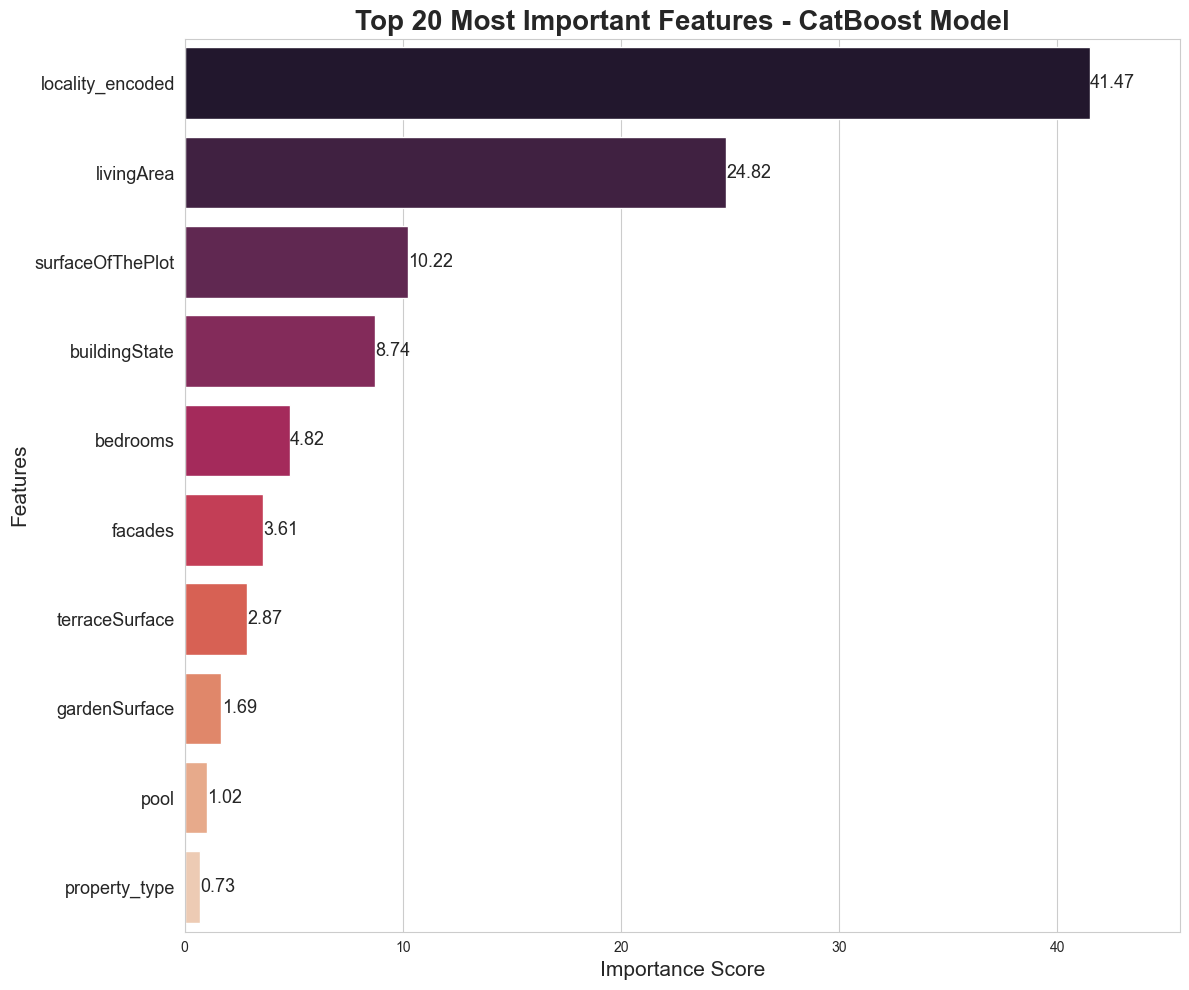

In [86]:
# Average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)
 
# Convert to DataFrame
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
 
# Sort and take the top 20 features
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)
 
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("rocket", len(top_features))
 
# Create the plot
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='Importance', y='Feature', data=top_features, palette=palette)
 
# Customize the plot
plt.title('Top 20 Most Important Features - CatBoost Model', fontsize=20, fontweight='bold')
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
 
# Add value labels to the end of each bar
for i, v in enumerate(top_features['Importance']):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontsize=13)
 
# Extend x-axis by 10% and feature names font size
plt.xlim(0, max(top_features['Importance']) * 1.1)
plt.yticks(fontsize=13)
 
# Adjust layout and display
plt.tight_layout()
plt.show()

In [87]:
#Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

#Evaluate Mean Square Root (MSE)
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(model.score)
print(f"Root Mean Squared Error: {rmse:.2f}, Mean Square Error: {mse:.2f}" )

<bound method CatBoostRegressor.score of <catboost.core.CatBoostRegressor object at 0x13c96fad0>>
Root Mean Squared Error: 0.30, Mean Square Error: 0.09


In [ ]:
validation_pool = Pool(y_pred, y_test)
metrics = model.eval_metrics(data=validation_pool, metrics=['R2', 'RMSE', 'MAE'])
print(metrics)

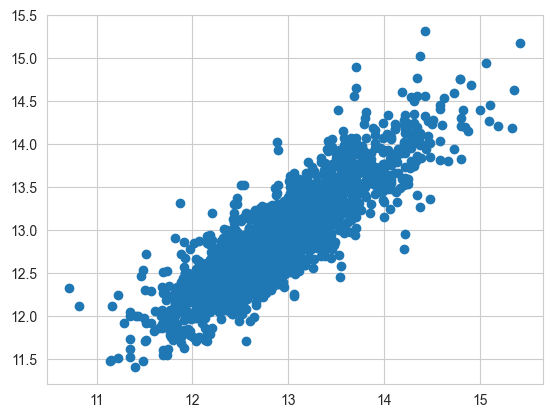

In [88]:
plt.scatter(y_test, y_pred)

plt.show()

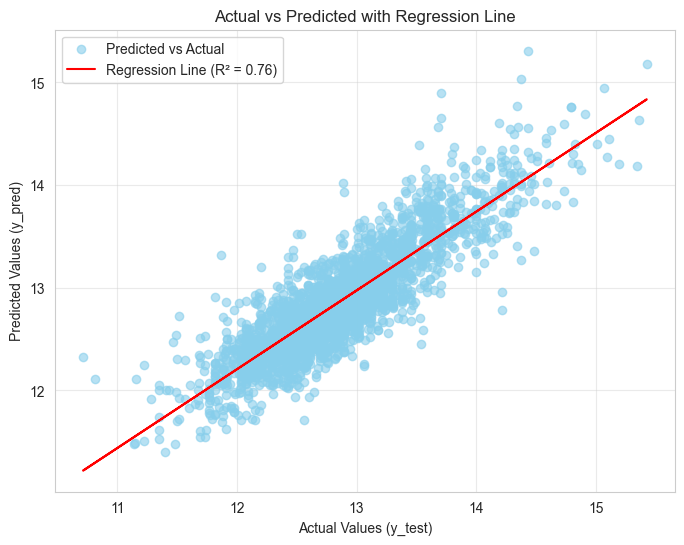

In [89]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="skyblue", label="Predicted vs Actual")

# Calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
regression_line = slope * np.array(y_test) + intercept

# Plot regression line
plt.plot(y_test, regression_line, color="red", label=f"Regression Line (R² = {r_value**2:.2f})")

#
#labels, title, and legend
plt.title("Actual vs Predicted with Regression Line")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [554]:
df.price.max()

10500000.0

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error, r2_score, f1_score

In [91]:
import sklearn
from sklearn import metrics
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,mean_squared_log_error, r2_score, f1_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
msle = metrics.mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Compare Training & Test data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#R2 train & test comparission
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

#Print Scores
print(f"Test RMSE: {rmse}, Test R2: {r2}, Test MSE: {mse}, TEST MAE: {mae}, Test MSLE: {msle}")
print(f"Training RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}, Test R²: {test_r2}")

# F1 Score
"""f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
"""

Test RMSE: 0.2964924071812338, Test R2: 0.7609603129150551, Test MSE: 0.08790774751612254, TEST MAE: 0.2254733258217296, Test MSLE: 0.00045575516345261696
Training RMSE: 0.21328252934330072, Test RMSE: 0.2964924071812338
Training R²: 0.8805030323877293, Test R²: 0.7609603129150551


'f1 = f1_score(y_test, y_pred)\nprint("F1 Score:", f1)\n'

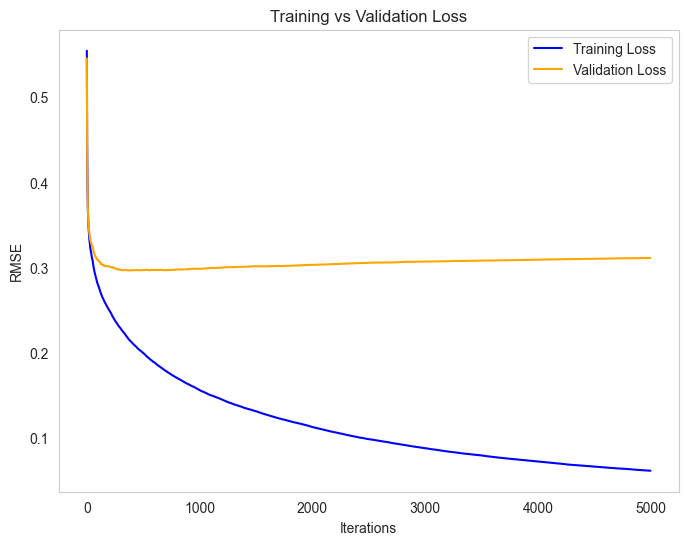

In [92]:
# Extract loss values
loss = model.evals_result_
train_loss = loss['learn']['RMSE']
test_loss = loss['validation']['RMSE']

# Plot training vs validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label="Training Loss", color="blue")
plt.plot(test_loss, label="Validation Loss", color="orange")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


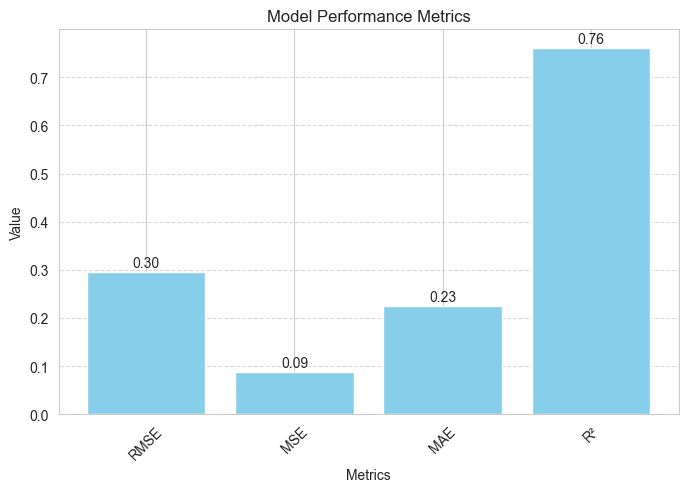

In [943]:


# Metrics calculated earlier
metrics = {
    "RMSE": rmse,
    "MSE": mse,
    "MAE": mae,
   
    "R²": r2
}

# Prepare data
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color='skyblue')
plt.title("Model Performance Metrics")
plt.ylabel("Value")
plt.xlabel("Metrics")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate values on bars
for i, v in enumerate(metric_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=10)

plt.show()


In [775]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from catboost import CatBoostRegressor
import time

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a CatBoost model and return RMSE, MAE, and R2 scores.
    """
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Function to train and evaluate with different hyperparameters
def train_with_catboost(hyperparameters, X_train, X_test, y_train, y_test):
    """
    Train CatBoost with different hyperparameters and return results for analysis.
    """
    results = []  # To store results for analysis
    
    keys = hyperparameters.keys()
    total_combinations = 1
    for key in keys:
        total_combinations *= len(hyperparameters[key])
    
    print(f"Total combinations to test: {total_combinations}")
    combination_counter = 0

    for depth in hyperparameters.get("depth", [6]):  # Default depth if not provided
        for learning_rate in hyperparameters.get("learning_rate", [0.1]):
            for iterations in hyperparameters.get("iterations", [500]):
                combination_counter += 1
                print(f"\nTesting combination {combination_counter}/{total_combinations}")
                print(f"Depth: {depth}, Learning Rate: {learning_rate}, Iterations: {iterations}")
                
                # Initialize the CatBoostRegressor with current hyperparameters
                model = CatBoostRegressor(
                    depth=depth,
                    learning_rate=learning_rate,
                    iterations=iterations,
                    cat_features=categorical_feature_indices,  # Use your categorical features here
                    verbose=0
                )
                
                # Train the model
                start_time = time.time()
                model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=500)
                end_time = time.time()
                
                # Evaluate the model
                metrics = evaluate_model(model, X_test, y_test)
                metrics["Training Time (s)"] = end_time - start_time
                
                # Append hyperparameters and metrics to results
                results.append({
                    "Depth": depth,
                    "Learning Rate": learning_rate,
                    "Iterations": iterations,
                    **metrics
                })
    
    # Create a DataFrame for analysis
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
hyperparameters = {
    "depth": [4, 6, 8,10,12,15,20,25,30,60],
    "learning_rate": [0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1],
    "iterations": [10, 50,100,500, 1000,2500, 5000, 6500, 7500, 10000]
}

results_df = train_with_catboost(hyperparameters, X_train, X_test, y_train, y_test)

# Display results sorted by RMSE
print(results_df.sort_values(by="RMSE", ascending=True))


Total combinations to test: 1000

Testing combination 1/1000
Depth: 4, Learning Rate: 0.05, Iterations: 10
0:	learn: 0.6030520	test: 0.5926559	best: 0.5926559 (0)	total: 1.69ms	remaining: 15.3ms
9:	learn: 0.5209972	test: 0.5135939	best: 0.5135939 (9)	total: 17.6ms	remaining: 0us

bestTest = 0.5135938854
bestIteration = 9


Testing combination 2/1000
Depth: 4, Learning Rate: 0.05, Iterations: 50
0:	learn: 0.6030520	test: 0.5926559	best: 0.5926559 (0)	total: 1.43ms	remaining: 70.1ms
49:	learn: 0.3929529	test: 0.3898289	best: 0.3898289 (49)	total: 79.3ms	remaining: 0us

bestTest = 0.3898288515
bestIteration = 49


Testing combination 3/1000
Depth: 4, Learning Rate: 0.05, Iterations: 100
0:	learn: 0.6030520	test: 0.5926559	best: 0.5926559 (0)	total: 1.34ms	remaining: 132ms
99:	learn: 0.3569964	test: 0.3555825	best: 0.3555825 (99)	total: 136ms	remaining: 0us

bestTest = 0.3555824556
bestIteration = 99


Testing combination 4/1000
Depth: 4, Learning Rate: 0.05, Iterations: 500
0:	learn: 0.60

KeyboardInterrupt: 